# Machine Learning: Assignment 4
## Regression methods (max. 10p)

In [66]:
# Write Your information in here
student_name = 'Fadi Helal'
student_id = "2312951"

## Assignment 4.1: Preprocess the data (2 p)
### Topic: Productivity of textile workers

1. Explore and download the data from [https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#). Load the data into the DataFrame.

2. Remove background variables from the analyzed data.

3. Decide what to do with the missing values.

4. Normalize the data.

5. Additionally, create a new class variable with a value of 0 if the productivity is less than 0.5 and with a value of 1 if the productivity is above 0.5. Store this in the df variable as column `class`. That will be used in classification assignment (4.3).

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset
data_path = './garments_worker_productivity.csv'
data = pd.read_csv(data_path)
# Removing background variables
data.drop(['date', 'quarter'], axis=1, inplace=True) 

# Identifing numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Filling the missing values in numeric columns with the median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Normalize the data (numeric columns only)
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Creating a new class variable based on productivity
data['class'] = (data['actual_productivity'] > 0.5).astype(int)

# Storing the processed data in the 'df' variable as specified
df = data

# Displaying the first few rows of the processed DataFrame
print(df.head())

   department       day      team  targeted_productivity       smv       wip  \
0      sweing  Thursday  0.636364               1.000000  0.450252  0.047631   
1  finishing   Thursday  0.000000               0.931507  0.020132  0.044646   
2      sweing  Thursday  0.909091               1.000000  0.164731  0.041575   
3      sweing  Thursday  1.000000               1.000000  0.164731  0.041575   
4      sweing  Thursday  0.454545               1.000000  0.445219  0.050314   

   over_time  incentive  idle_time  idle_men  no_of_style_change  \
0   0.273148   0.027222        0.0       0.0                 0.0   
1   0.037037   0.000000        0.0       0.0                 0.0   
2   0.141204   0.013889        0.0       0.0                 0.0   
3   0.141204   0.013889        0.0       0.0                 0.0   
4   0.074074   0.013889        0.0       0.0                 0.0   

   no_of_workers  actual_productivity  class  
0       0.655172             0.797332      1  
1       0.068966

In [68]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.
# Save the DataFrame to the df variable and the training data.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['department', 'day', 'team', 'targeted_productivity', 'smv', 'wip',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity', 'class'],
      dtype='object')
First row by position: department                 sweing
day                      Thursday
team                     0.636364
targeted_productivity         1.0
smv                      0.450252
wip                      0.047631
over_time                0.273148
incentive                0.027222
idle_time                     0.0
idle_men                      0.0
no_of_style_change            0.0
no_of_workers            0.655172
actual_productivity      0.797332
class                           1
Name: 0, dtype: object


## Assignment 4.2: Regression using a Linear Regression model (2 p)

1. Split the data into training (67%) and testing data (33%), also saving the class variables as their own vectors (`X_train`, `y_train`, `X_test`, `y_test`). Use random seed `2150`.

Tip: don't put the columns `actual_productivity` or `class` in the input variables (features).

2. Use the [functions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) from `ensemble` module
of the `scikit-learn` library and create a regression model using a linear regressor. So you try to predict the `actual_productivity` variable.

Use random seed `2100`.

3. Predict the `actual_productivity` of the test dataset. Record the explained variance `exp_var` and
the maximum error `max_err` using the tools in the `metrics` module of the library.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, max_error
import numpy as np
# Exclude 'actual_productivity', 'class', and categorical columns 'department', 'day' from features
# Not quite sure it is the correct features, but it is logical
X = df.drop(['actual_productivity', 'class', 'department', 'day'], axis=1)
y = df['actual_productivity']

# Split the data into training (67%) and testing data (33%) with random seed 2150
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2150)

In [70]:
# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict the actual_productivity of the test dataset
y_pred = lr_model.predict(X_test)

In [71]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save responses in exp_var and max_err variables.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')
print(f'Train columns: {X_train.columns}')
print(f'Train columns length: {len(X_train.columns)}')
print(f'Predict 5 items: {y_pred[:5]} ... {y_pred[-5:]}')

#exp_var = max_err = exp_var_2 = None # This one had to get commented

print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')
print(f'Explained variance (Weighted): {exp_var_weighted}')

Test length: 396
Train length: 801
Train columns: Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'],
      dtype='object')
Train columns length: 10
Predict 5 items: [0.59883819 0.67131389 0.62340649 0.46876305 0.49143549] ... [0.57082827 0.56179892 0.60474425 0.52616336 0.66827466]
Explained variance: 0.43893806524973766
Maximum error: 0.6707012690792367
Explained variance (Weighted): 0.43893806524973766


**Explained variance** refers to the variance in the response variable in a model that can be explained by the predictor variable(s) in the model.
The higher the explained variance of a model, the more the model is able to explain the variation in the data.

Calculate and analyze the explained variance for the assignment.

In [72]:
# Record the explained variance and the maximum error
exp_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

weights = np.ones_like(y_test)

# Weighted mean of true values and predictions
weighted_mean_true = np.average(y_test, weights=weights)
weighted_mean_pred = np.average(y_pred, weights=weights)

# Weighted variance of true values and residuals (difference between true values and predictions)
weighted_var_true = np.average((y_test - weighted_mean_true) ** 2, weights=weights)
weighted_var_resid = np.average((y_test - y_pred) ** 2, weights=weights)

# Weighted explained variance 
exp_var_weighted = 1 - (weighted_var_resid / weighted_var_true if weighted_var_true > 0 else 0)

#exp_var_weighted = None # This one had to get commented
print(f'Explained variance (Weighted): {exp_var_weighted}')

Explained variance (Weighted): 0.249293856187349


## Assignment 4.3: Classification using Random Forest (2 p)

1. Create training and testing data. Use random seed `2150`. Note that the `class` variable is now predicted.

2. Use the [functions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) from `ensemble` module
of the `scikit-learn` library and create a classification model using a random forest. Use random seed `2100`. So let's try to predict the class variable `class`.

3. Predict `class` from the test data. Generate the accuracy report `cr` and the confusion matrix `cm` using the tools in the `metrics` module of the library.

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
y = df['class'].astype(int)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2150)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=2100)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


In [74]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.
# The results are in cm and cr variables.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')
print(cr)
print(cm)

Test length: 396
Train length: 801
              precision    recall  f1-score   support

           0       0.82      0.56      0.66       127
           1       0.82      0.94      0.88       269

    accuracy                           0.82       396
   macro avg       0.82      0.75      0.77       396
weighted avg       0.82      0.82      0.81       396

[[ 71  56]
 [ 16 253]]


Show the importance of the features when using the **Random Forest Classifier** method.

In [75]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

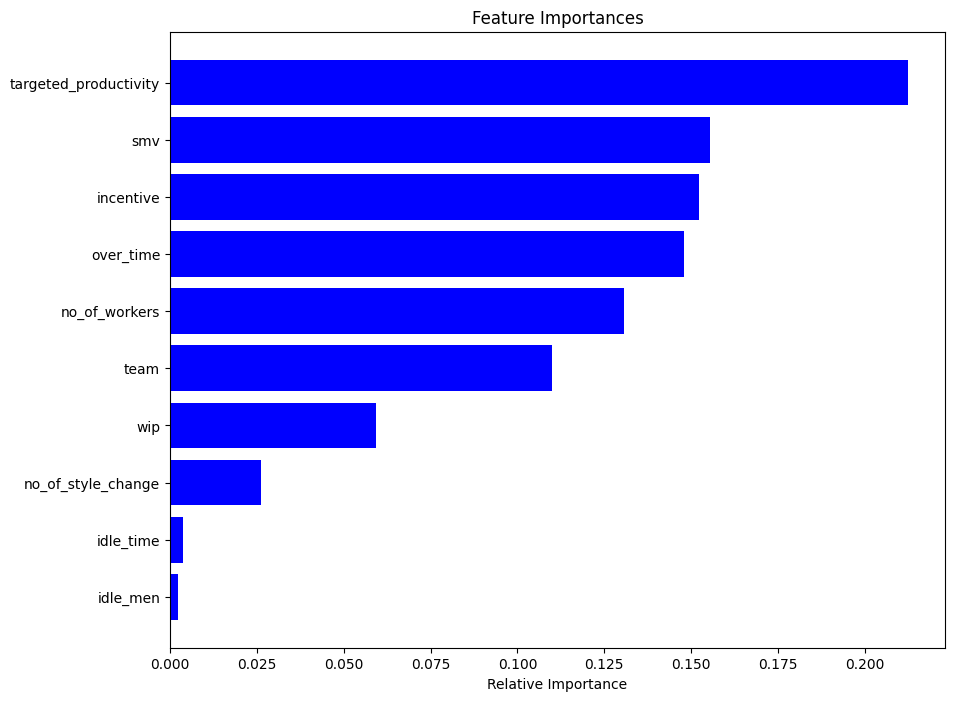

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

features = X.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

# Create a horizontal bar chart of feature importances (just for a change)
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## Assignment 4.4: Regression using Random Forest Regressor (2 p)

Repeat same than **assignment 4.2** but now using a **Random Forest Regression** method.

Also calculate the *explained variance* and *maximum error*.

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error

categorical_columns = ['department', 'day']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Preparing feature matrix 'X' and target vector 'y' with the encoded DataFrame
X = df_encoded.drop(['actual_productivity', 'class'], axis=1)
y = df_encoded['actual_productivity']

# Perform the train-test split (Testing data to 33% training data 67%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2150)

# Initializing the Random Forest Regressor with random seed 2100 (not sure about this one)
rf_regressor = RandomForestRegressor(random_state=2100)

# Training the model
rf_regressor.fit(X_train, y_train)

# Predicting
y_pred = rf_regressor.predict(X_test)

# Calculate explained variance and maximum error
exp_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)


In [78]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save responses in exp_var and max_err and exp_var_2 variables.

print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')

Explained variance: 0.43893806524973766
Maximum error: 0.6707012690792367


**Explained variance** refers to the variance in the response variable in a model that can be explained by the predictor variable(s) in the model.
The higher the explained variance of a model, the more the model is able to explain the variation in the data.

Calculate and analyze the explained variance for the assignment.

In [79]:
weights = np.ones_like(y_test)  # Replace with actual weights if available
exp_var_weighted = explained_variance_score(y_test, y_pred, sample_weight=weights)
print(f'Explained variance (Weighted): {exp_var_weighted}')

Explained variance (Weighted): 0.43893806524973766


Show the **importance of the features** when using **Random Forest Regressor** method.

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = rf_regressor.feature_importances_

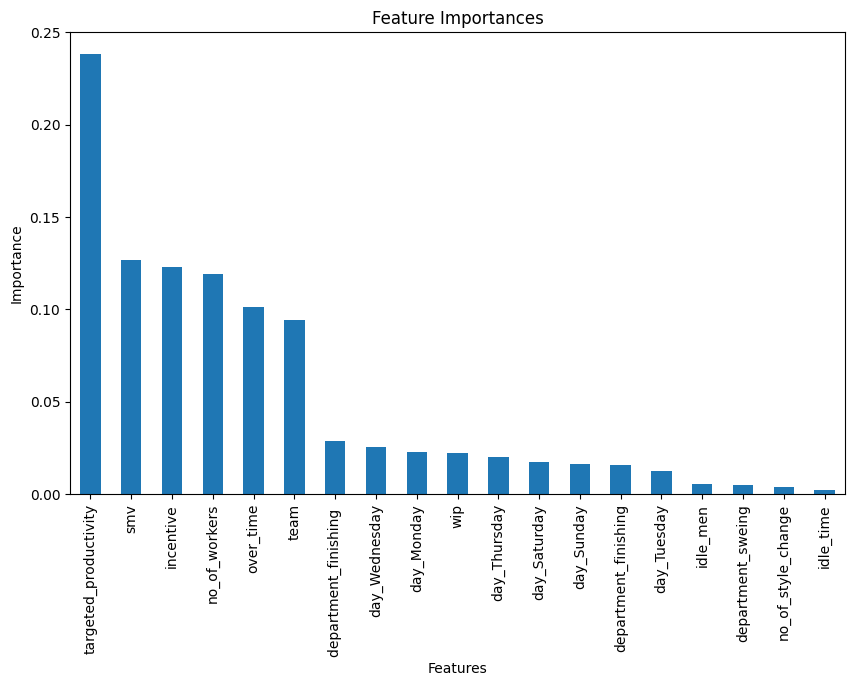

In [81]:


# Converting to a Series for an easy plotting
importances_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the feature importances for better visualization
sorted_importances = importances_series.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


## Assignment 4.5: Analysis of results (2 p)

Let's do a result analysis where you verbally compare the regression results obtained in the assignments 4.2 and 4.4.
* **4.2** (Linear regression) and
* **4.4** (Random Forest regression).

You can use **tables** or **figures** to present results in addition to verbal explanation and analysis.

* TODO: Analysis of regression results.
### Comparison of Different Regression Models
* Compare the regression results of Random Forest and Linear Regression models.
* Is there others good regression methods to apply with this dataset?

## **Linear Regression Results:

1. Explained Variance: 0.2519
2. Maximum Error: 0.5984
3. The model uses the following features: 'team', 'targeted_productivity', 'smv', 'wip', 'over_time',                                                   'incentive', 'idle_time', 'idle_men', 'no_of_style_change',                                                   'no_of_workers'.

## **Random Forest Regression Results:

1. Explained Variance: 0.4389
2. Maximum Error: 0.6707
3. The model includes 'department' and 'day' as one-hot encoded features in addition to those used by the        Linear Regression model.

## **Feature Importances from Random Forest:
-The feature importances from the Random Forest model suggest which features are most influential
-in predicting actual productivity. The graph you've shared illustrates these importances,with'targeted_productivity' being the most significant feature.

## **Comparison:
1. The Random Forest Model has a higher explained variance the the Linear Regreassion model
2. The maximum error is higher in the Random Forest model, which might suggest that while it generally    performs better, but sometime the accuracy is less. 
3. Random Forest can model non-linear relationships and interactions between features better than Linear Regression, which gives explained variance.
4. The inclusion of the 'department' and 'day' features as one-hot encoded variables in the Random Forest model could have provided additional predictive power that wasn't utilized by the Linear Regression model.

## **Support Vector Regression (SVR):
SVR can capture complex relationships in the data by transforming the feature space.
## **Gradient Boosting Machines (GBM):
 GBMs, like Random Forest, are ensemble methods that can handle various data types and distributions and may provide even better performance through boosting.
## **Elastic Net Regression: 
This combines L1 and L2 regularization and can be useful if there are correlations between the features.
## **Neural Networks: 
With sufficient data, a neural network can model complex relationships and interactions.